<a href="https://colab.research.google.com/github/manurah/ML-CW/blob/main/ML_CW_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



--- 1. AI Ethics: Fairness & Bias Analysis ---

Analyzing Bias in: gender
   gender  Churn_Rate
0  Female    0.269209
1    Male    0.261603


/tmp/ipython-input-385728411.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group, y='Churn_Rate', data=bias_check, palette='magma')


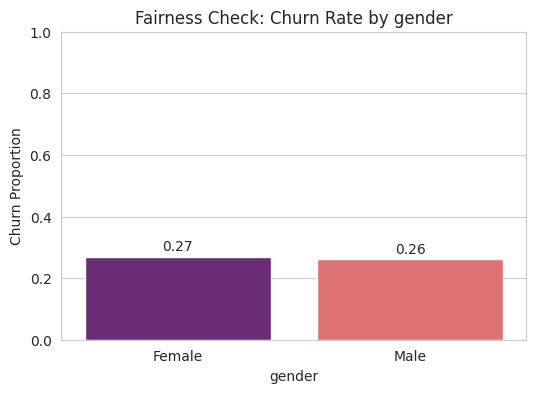

FAIRNESS CHECK PASSED: The difference is small (0.01).

Analyzing Bias in: SeniorCitizen
   SeniorCitizen  Churn_Rate
0              0    0.236062
1              1    0.416813


/tmp/ipython-input-385728411.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group, y='Churn_Rate', data=bias_check, palette='magma')


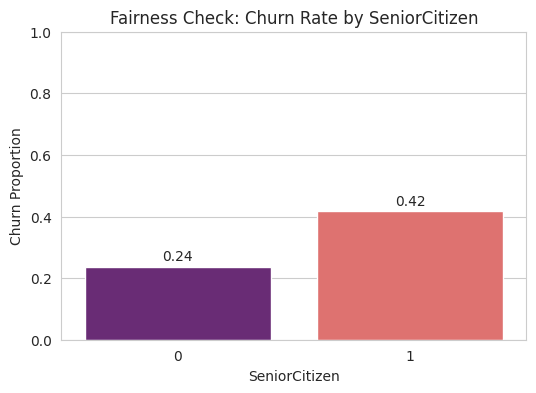

POTENTIAL BIAS DETECTED: The difference in churn predictions for SeniorCitizen is large (0.18).
Strategy: We must ensure the model isn't using this feature to discriminate unlawfully.

--- 2. Post-Deployment: Data Drift Monitoring ---
Simulating next month's data to check if model needs retraining...


/tmp/ipython-input-385728411.py:75: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(current_data, shade=True, label='Training Data (Baseline)', color='blue')
/tmp/ipython-input-385728411.py:76: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_data, shade=True, label='New Data (Live)', color='red')


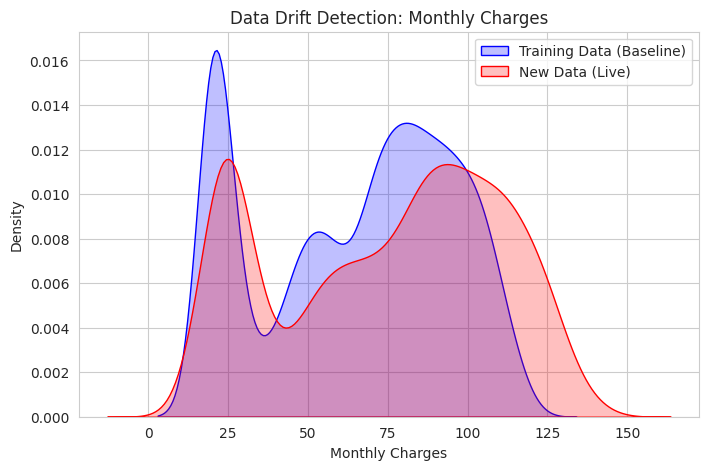

Drift Test (KS-Test) P-Value: 0.00000
DATA DRIFT DETECTED!
Strategy: The data distribution has changed significantly.
Action: Trigger automatic retraining pipeline.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# --- CONFIGURATION ---
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

def load_data():
    # Re-load data to ensure we have the raw columns for Ethics check
    filename = '/content/drive/MyDrive/cw/WA_Fn-UseC_-Telco-Customer-Churn.csv'
    df = pd.read_csv(filename)

    # Basic cleanup
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
    return df

# ==========================================
# PART 1: AI ETHICS (Bias Detection)
# ==========================================
def check_fairness(df):
    print("\n--- 1. AI Ethics: Fairness & Bias Analysis ---")

    # We check if the Churn Rate is significantly different for protected groups
    protected_groups = ['gender', 'SeniorCitizen']

    for group in protected_groups:
        print(f"\nAnalyzing Bias in: {group}")

        # Calculate Churn Rate per group
        bias_check = df.groupby(group)['Churn'].mean().reset_index()
        bias_check.columns = [group, 'Churn_Rate']

        print(bias_check)

        # Visualization
        plt.figure(figsize=(6, 4))
        sns.barplot(x=group, y='Churn_Rate', data=bias_check, palette='magma')
        plt.title(f'Fairness Check: Churn Rate by {group}')
        plt.ylabel('Churn Proportion')
        plt.ylim(0, 1)

        # Add values
        for index, row in bias_check.iterrows():
            plt.text(index, row.Churn_Rate + 0.02, f'{row.Churn_Rate:.2f}', ha='center')

        plt.show()

        # Ethics Interpretation
        rates = bias_check['Churn_Rate'].values
        diff = abs(rates[0] - rates[1])
        if diff > 0.1:
            print(f"POTENTIAL BIAS DETECTED: The difference in churn predictions for {group} is large ({diff:.2f}).")
            print("Strategy: We must ensure the model isn't using this feature to discriminate unlawfully.")
        else:
            print(f"FAIRNESS CHECK PASSED: The difference is small ({diff:.2f}).")

# ==========================================
# PART 2: POST-DEPLOYMENT STRATEGY (Drift)
# ==========================================
def simulate_deployment_monitoring(df):
    print("\n--- 2. Post-Deployment: Data Drift Monitoring ---")
    print("Simulating next month's data to check if model needs retraining...")

    # Simulate "New Data" (e.g., Next month, customers are slightly different)
    # We artificially increase MonthlyCharges to simulate inflation/price hikes
    current_data = df['MonthlyCharges']
    new_data = df['MonthlyCharges'] * 1.15 + np.random.normal(0, 5, len(df))

    # Visualization of Drift
    plt.figure(figsize=(8, 5))
    sns.kdeplot(current_data, shade=True, label='Training Data (Baseline)', color='blue')
    sns.kdeplot(new_data, shade=True, label='New Data (Live)', color='red')
    plt.title('Data Drift Detection: Monthly Charges')
    plt.xlabel('Monthly Charges')
    plt.legend()
    plt.show()

    # Statistical Test (Kolmogorov-Smirnov Test)
    stat, p_value = ks_2samp(current_data, new_data)
    print(f"Drift Test (KS-Test) P-Value: {p_value:.5f}")

    if p_value < 0.05:
        print("DATA DRIFT DETECTED!")
        print("Strategy: The data distribution has changed significantly.")
        print("Action: Trigger automatic retraining pipeline.")
    else:
        print("No Drift Detected. Model is stable.")

# --- EXECUTION ---
if __name__ == "__main__":
    df = load_data()
    check_fairness(df)
    simulate_deployment_monitoring(df)